# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
**Source**
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**Important**: We mentioned in our data ethics lesson earlier that data can include offensive or inappropriate language at times. This is already becoming very apparent in the Boston Data, which includes a racial variable. 
Note that the Boston Housing data was constructed in the 1970’s, and is based on US census Data. On census.gov, you can read the following note:
> "Census statistics date back to 1790 and reflect the growth and change of the United States. Past census reports contain some terms that today's readers may consider obsolete and inappropriate. As part of our goal to be open and transparent with the public, we are improving access to all Census Bureau original publications and statistics, which serve as a guide to the nation's history."

With that note, it is important to absolutely handle with care, and it is strongly adviced to _not_ use the racial variable when creating a predictive model.


## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')
df.head()






,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [2]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [15]:
#df['ptratio'].mean() #get some stats on my first comparison I want to make. 
df['tax'].median()

330.0

In [16]:
df['ptratio'].mean

<bound method Series.mean of 0      15.3
1      17.8
2      18.7
3      18.7
4      15.2
       ... 
328    19.2
329    21.0
330    21.0
331    21.0
332    21.0
Name: ptratio, Length: 333, dtype: float64>

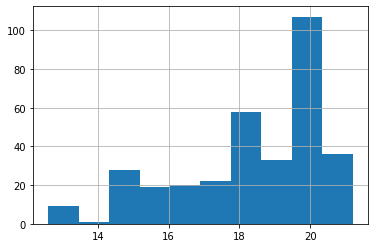

In [17]:
df['ptratio'].hist();

330.0

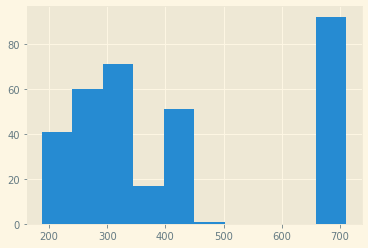

In [49]:
df['tax'].hist();
df['tax'].median()

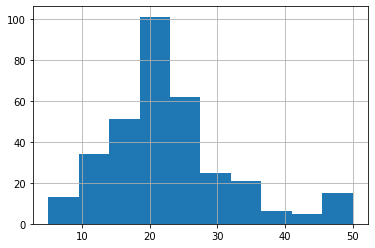

In [19]:
df['medv'].hist();

In [20]:
df['tax'].value_counts()

666    88
307    27
403    21
437    10
398     9
304     9
224     8
264     8
296     8
384     8
233     7
330     7
188     6
432     6
193     6
277     6
284     5
270     5
222     5
287     4
216     4
329     4
311     4
711     4
273     4
300     4
247     4
281     3
305     3
289     3
243     3
223     3
391     3
337     2
345     2
276     2
370     2
265     2
252     2
430     2
245     2
226     1
198     1
241     1
242     1
469     1
254     1
256     1
279     1
280     1
293     1
313     1
335     1
348     1
351     1
402     1
411     1
422     1
285     1
Name: tax, dtype: int64

In [21]:
df.loc[df['tax'] > 450, 'tax rate'] = 'high tax rate' # create new column based on tax rate
df.loc[df['tax'] <= 450, 'tax rate'] = 'low tax rate'

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 16 columns):
ID          333 non-null int64
crim        333 non-null float64
zn          333 non-null float64
indus       333 non-null float64
chas        333 non-null int64
nox         333 non-null float64
rm          333 non-null float64
age         333 non-null float64
dis         333 non-null float64
rad         333 non-null int64
tax         333 non-null int64
ptratio     333 non-null float64
b           333 non-null float64
lstat       333 non-null float64
medv        333 non-null float64
tax rate    333 non-null object
dtypes: float64(11), int64(4), object(1)
memory usage: 41.8+ KB


In [23]:
df['ptratio'].value_counts()

20.2    94
14.7    24
21.0    17
17.8    16
17.4    14
19.1    13
18.4    12
16.6    11
18.6    10
21.2    10
15.2     9
17.9     9
19.2     9
13.0     8
20.9     8
18.7     6
16.1     5
19.7     5
18.5     4
19.6     4
20.1     4
18.2     3
19.0     3
16.0     3
16.8     3
17.6     3
14.9     3
18.3     3
15.3     3
18.9     2
16.9     2
17.0     2
15.6     2
18.0     1
16.4     1
13.6     1
15.5     1
12.6     1
17.3     1
15.1     1
21.1     1
15.9     1
Name: ptratio, dtype: int64

In [30]:
df.loc[df['ptratio'] > 16, 'ptratio nat average'] = 'below average ptratio' # create new column based on national average of ptratio
df.loc[df['ptratio'] <= 16, 'ptratio nat average'] = 'above average ptratio'

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 17 columns):
ID                     333 non-null int64
crim                   333 non-null float64
zn                     333 non-null float64
indus                  333 non-null float64
chas                   333 non-null int64
nox                    333 non-null float64
rm                     333 non-null float64
age                    333 non-null float64
dis                    333 non-null float64
rad                    333 non-null int64
tax                    333 non-null int64
ptratio                333 non-null float64
b                      333 non-null float64
lstat                  333 non-null float64
medv                   333 non-null float64
tax rate               333 non-null object
ptratio nat average    333 non-null object
dtypes: float64(11), int64(4), object(2)
memory usage: 44.4+ KB


In [26]:
df['tax rate'].value_counts()

low tax rate     240
high tax rate     93
Name: tax rate, dtype: int64

In [34]:
df['ptratio nat average'].value_counts()

below average ptratio    276
above average ptratio     57
Name: ptratio nat average, dtype: int64

In [35]:
df.loc[(df['tax rate'] == 'high tax rate') & (df['ptratio nat average'] == 'below average ptratio')]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tax rate,ptratio nat average


In [37]:
df.loc[(df['tax rate'] == 'high tax rate') & (df['ptratio nat average'] == 'below average ptratio')]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tax rate,ptratio nat average
34,55,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9,high tax rate,below average ptratio
234,357,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,high tax rate,below average ptratio
235,358,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7,high tax rate,below average ptratio
236,359,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7,high tax rate,below average ptratio
237,360,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6,high tax rate,below average ptratio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,488,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6,high tax rate,below average ptratio
322,489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2,high tax rate,below average ptratio
323,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1,high tax rate,below average ptratio
324,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6,high tax rate,below average ptratio


In [38]:
high_tax_less_students = df.loc[(df['tax rate'] == 'high tax rate') & (df['ptratio nat average'] == 'below average ptratio')]
len(high_tax_less_students)

93

In [40]:
plt.style.use('Solarize_Light2')

In [41]:
imp_values_df = df[['tax', 'ptratio', 'medv']].copy()
imp_values_df.head()

,tax,ptratio,medv
0,296,15.3,24.0
1,242,17.8,21.6
2,222,18.7,33.4
3,222,18.7,36.2
4,311,15.2,22.9


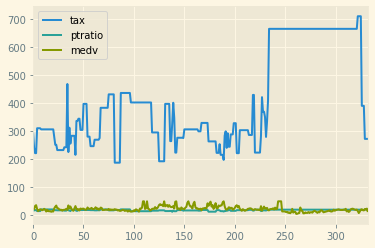

In [42]:
imp_values_df.plot()

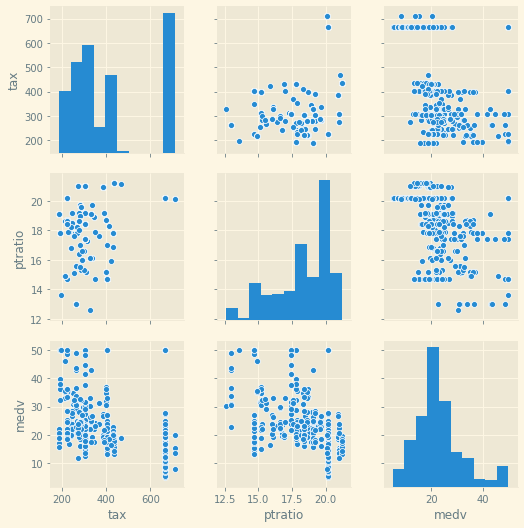

In [43]:
sns.pairplot(imp_values_df)

In [47]:
# As I modeled here, you can see that there are some relationships between property tax rates, pupil-teacher ratio, and 
# median home value. Property tax and pupil-teacher ratio share a positive relationship, which leads me to believe the higher
# taxed areas on average have a better pupil-teacher ratio due to increased funding. On the topic of pupil-teacher ratio, 
# it appears to have little to no relationship with median home value. 
# Interestingly, tax and median home value have a strong inverse relationship, the higher property tax rate tends to not 
# correlate with a higher home value, and instead seems to do the opposite. There seems to be a "sweet spot" in the middle 
# of the tax bracket where home values are highest(between the 250-450). 
imp_values_df.cov()

,tax,ptratio,medv
tax,29186.985021,171.839854,-702.233420
ptratio,171.839854,4.630335,-9.502200
medv,-702.233420,-9.502200,84.152516
